# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from random import sample
from sklearn.model_selection import train_test_split

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

Explanation on confusion matrix for reference:
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        #END Workspace 1.1
        unique, counts = np.unique(self._y, return_counts=True)
        counts = dict(zip(unique, counts))
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        #END Workspace 1.2
        digit = [0,1,2,3,4,5,6,7,8,9,-1]
        result = []
        for i in indices[0]: # loops through k closest neighbor's indices and get which digit it is and stores it.
            result.append(digit[digit.index(self._y[0][i])])
        
        result_count = dict((i, result.count(i)) for i in digit) # loop through all nearest digits and gets its' count.
        desc_ind_list = sorted(result_count, key=result_count.get, reverse=True) # sortes result_count into descending order
        
        if(result_count[desc_ind_list[0]] == result_count[desc_ind_list[1]]): # equal weigth
            #print("Tie between {} : {} !".format(desc_ind_list[0],desc_ind_list[1]))
            count = self.getCounts() # gets counts of each digits
            
            # give label to the max value in the count.
            if(count[desc_ind_list[0]] > count[desc_ind_list[1]]): label = desc_ind_list[0]
            else: label = desc_ind_list[1]
                
            #print("label assigned after tie: ",label)
            
        else:
            label = desc_ind_list[0]  
            
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k 
        into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        ans = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        #END Workspace 1.3
        dist, ind = self._model.query([point], k=self._k) # returns distance and indices of k nearest neighbors
        ans = self.majority(ind)
        return(ans)
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        # get unique values in self.y to determine N
        N = len(set(self._y[0]))
        C = np.array(np.zeros([N,N]))
        key_map = {-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9} # Using mapping to index in matrix

        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        for i in range(len(testX)):
            C[key_map[testX[i]]][key_map[testY[i]]] += 1
        #END Workspace 1.4
        
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [3]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        self.test = np.array([[2,1],[2,3],[7,1],[2,6],[4,4]])
        self.px = [1,-1,1,-1,-1]
        self.knntwo = KNNClassifier(self.test,[self.px],2)
        self.py = []
        for i in self.test:
            self.py.append(self.knnone.classify(i))
    def plot(self):
        x = [i[0] for i in self.x]
        y = [i[1] for i in self.x]
        plt.scatter(x,y)
        plt.show()
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
        
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
        self.assertEqual(self.knnone.classify(self.testPoints[1]), -1)
        self.assertEqual(self.knnone.classify(self.testPoints[2]), -1)
        
    #BEGIN Workspace
    #Add more test functions as desired
    #HINT - You'll want to make sure each of your functions from the KNNClassifier class you created work correctly...
    #END Workspace 
    
    def testKNNTwo(self):
        self.assertEqual(self.knntwo.classify(self.testPoints[0]),-1)
    def testKNNThree(self):
        '''
        Test if the classifier returns "correct" classification for k=3
        '''
        self.assertEqual(self.knnthree.classify(self.testPoints[0]),-1)
        self.assertEqual(self.knnthree.classify(self.testPoints[1]),-1)
        self.assertEqual(self.knnthree.classify(self.testPoints[2]),-1)
        
    def testKNNFive(self):
        '''
        Test if the classifier returns "correct" classification for k=5
        '''
        self.assertEqual(self.knnfive.classify(self.testPoints[0]),-1)
        self.assertEqual(self.knnfive.classify(self.testPoints[1]),-1)
        self.assertEqual(self.knnfive.classify(self.testPoints[2]),-1)
    def testConfusionMatrix(self):
        print("Confusion Matrix: \n", self.knnone.confusionMatrix(self.px,self.py))
        print("Accuracy: \n", self.knnone.accuracy(self.knnone.confusionMatrix(self.px,self.py)))
    
tests = KNNTester()
tests.setUp()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

......

Confusion Matrix: 
 [[3. 0.]
 [0. 2.]]
Accuracy: 
 1.0



----------------------------------------------------------------------
Ran 6 tests in 0.023s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [4]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()        
        #BEGIN Workspace 2.1
        # features ==> digits['data']
        # class ==> digits['target_names']
        # features_map_to ==> digits['target']
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #END Workspace 2.1
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(digits['data'], digits['target'], test_size=0.20, random_state=42)

        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        #END Workspace 2.2
        digits = sklearn.datasets.load_digits()
        print("Total data: ", digits['data'].shape)
        print("")
        print("Train Data:\n{} rows and {} datapoints ".format(self.train_x.shape[0],self.train_x.shape[1]))
        print("Train Label:\n{} rows ".format(self.train_y.shape[0]))
        print("")
        print("Test Data:\n{} rows and {} datapoints ".format(self.test_x.shape[0],self.test_x.shape[1]))
        print("Test Label:\n{} rows ".format(self.test_y.shape[0]))
        print("")
        print("Each images is {} x {} pixels resolution".format(digits['images'].shape[1],digits['images'].shape[2]))
        print("")
        
    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        #END Workspace 2.3
        predicted_value = []
        digit_knn = KNNClassifier(self.train_x, [self.train_y],5)
        for i in self.test_x:
            predicted_value.append(digit_knn.classify(i))
            
        print("Confusion Matrix: \n\n",digit_knn.confusionMatrix(self.test_y,predicted_value))
        print("\nAccuracy: \n", digit_knn.accuracy(digit_knn.confusionMatrix(self.test_y,predicted_value)))
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        

In [5]:
test = Numbers()
test.report()
test.classify()

Total data:  (1797, 64)

Train Data:
1437 rows and 64 datapoints 
Train Label:
1437 rows 

Test Data:
360 rows and 64 datapoints 
Test Label:
360 rows 

Each images is 8 x 8 pixels resolution

Confusion Matrix: 

 [[33.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 28.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 33.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 34.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 45.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 35.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 33.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 30.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0. 38.]]

Accuracy: 
 0.9861111111111112


*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

<Figure size 432x288 with 0 Axes>

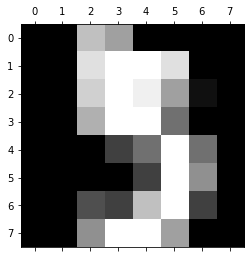

<Figure size 432x288 with 0 Axes>

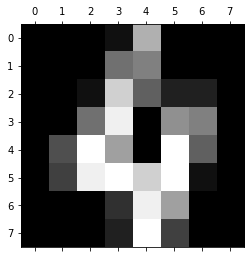

<Figure size 432x288 with 0 Axes>

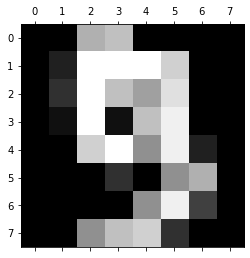

In [9]:
#BEGIN 3.1a
#TODO: Print out problem class images
# prints misclassified digits image
digits = sklearn.datasets.load_digits()
test.viewDigit(digits['images'][5])
test.viewDigit(digits['images'][4])

test.viewDigit(digits['images'][9])
#END 3.1a

#### 3.1b
TODO: Write description of misclassification

From looking at the confusion matrix, digit 5,7, and 9 are the misclassified as another digit. For example, digit 9 has been has classified as 4 and 5. I think it has to do with the pattern of grey scale and similar shape in the image. Between 5 and 9, we can see similar grey scale tiles even though some areas are more lighter in 5 than it is 9 and vice versa. 

The surprising part I found from confusion matrix is the lack of confusion between 0,6 and 9 or between 1 and 7. The way we human misclassify a digit by looking at handwriting and the way ML model misclassified a digit based on image data is quite different.  



In [10]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()        
        #BEGIN Workspace 2.1
        # features ==> digits['data']
        # class ==> digits['target_names']
        # features_map_to ==> digits['target']
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #END Workspace 2.1
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(digits['data'], digits['target'], test_size=(1-trainPercentage), random_state=42)

    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion matrix for test data
        #END Workspace 2.3
        predicted_value = []
        digit_knn = KNNClassifier(self.train_x, [self.train_y],5)
        for i in self.test_x:
            predicted_value.append(digit_knn.classify(i))
        #print(predicted_value)
        print("Confusion Matrix: \n",digit_knn.confusionMatrix(self.test_y,predicted_value))
        print("Accuracy: \n", digit_knn.accuracy(digit_knn.confusionMatrix(self.test_y,predicted_value)))
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

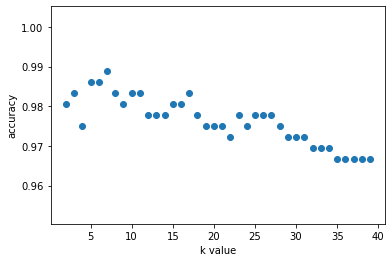

In [11]:
 
k_val = []
acc = []
for k in range(2,40):
    k_val.append(k)
    test = Numbers2(0.8)
    predicted_value = []
    digit_knn = KNNClassifier(test.train_x, [test.train_y],k)
    for i in test.test_x:
        predicted_value.append(digit_knn.classify(i))
    acc.append(digit_knn.accuracy(digit_knn.confusionMatrix(test.test_y,predicted_value)))
    
plt.scatter(k_val,acc)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

#### 3.2b
TODO: Write description of influence of neighbor count

For the plot, I only chose k value upto 40 because after 40, the accuracy keeps going down.
When we are changing k value, there is threshold where the accuracy increase. But after certain k value, then the accuracy drops. For this digit problem, the optimal k value for 80-20 split is 7. With k=7, we get highest accuracy. The reason the k value works well upto certain k value is due to how the data is distributed and data are together in some region. The bigger value of k after certain threshold, we lose accuracy because of over-fitting. So finding optimal k value seems to play important role in getting best result.

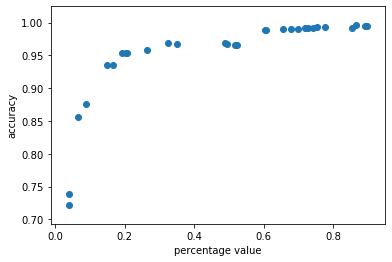

In [16]:
import random
p_val = []
acc = []
for j in range(0,30):
    p = random.uniform(0, 0.9)
    p_val.append(p)
    test = Numbers2(p)
    predicted_value = []
    digit_knn = KNNClassifier(test.train_x, [test.train_y],7)
    for i in test.test_x:
        predicted_value.append(digit_knn.classify(i))
    acc.append(digit_knn.accuracy(digit_knn.confusionMatrix(test.test_y,predicted_value)))
    
plt.scatter(p_val,acc)
plt.xlabel("percentage value")
plt.ylabel("accuracy")
plt.show()

#### 3.3b
TODO: Write description of influence of training / testing split

As I expected, the accuracy increased as we have more training data. This shows us the important of having a good size of training data to get more accurate data. 